In [39]:
#CONDA ENV base_conda (python 3.9.7)
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#Import your modules
#---------------------------------------
import te_rna_f as ter
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm


# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) \n[GCC 9.4.0]'

# L1 expression with age


In [129]:
# Metadata
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/PE/metadata_RNA_QC.tsv', index_col=0)
meta = meta[meta['RNA_passQC']]

ev_df = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/evolutionary_age.csv')

#Counts data
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_new_CPM.csv', index_col=0)

In [130]:

#Filter low CPM data
thresh = 1 
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
#load in metadata
#meta_ = meta

#load in metadata
# meta_ = meta
# INF = meta_[meta_['period'] == 'Infancy']# <2 infancy
# ECH = meta_[meta_['period'] == 'Early_Childhood'] # 2-5 early childhood
# LCH = meta_[meta_['period'] == 'Late_Childhood'] #5-12 late childhood
# ADO = meta_[meta_['period'] == 'Adolescence'] #12-20 adolescence
# ADU = meta_[meta_['period'] == 'Adulthood'] #20-50 adulthood
# LADU = meta_[meta_['period'] == 'Late_Adulthood'] #50-80 late adulthood


In [4]:
#Load in PE data for each sample
mode='CPM'
ID_l = meta['sample'].values
parent_path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te, mode)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
#df = df.astype(int)

#write to csv
df.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_new_' + mode + '.csv')

l1_ind = [x for x,i in enumerate(df.index) if 'L1' in i]#l1 ind
alu_ind = [x for x,i in enumerate(df.index) if 'Alu' in i]#alu ind
sva_ind = [x for x,i in enumerate(df.index) if 'SVA' in i]#sva ind

In [131]:
#make into df with RNA, age, class, celltype
curr_df = sub_df
mode = 'coarse'

meta_ = meta[['celltype', 'sex', 'age', 'period']]
meta_['period'][meta_['age'] == 1.02] = 'Early_Childhood'

#meta_['period'][meta_['age'] == 2] = 'Infancy'

if mode == 'coarse':
    group_df = {'period':[], 'celltype':[], 'Class':[], 'RNA':[]}
    l1_v = [np.mean(curr_df.iloc[[x for x,i in enumerate(curr_df.index) if 'L1' in i]][i])for i in meta['sample'].values]
    alu_v = [np.mean(curr_df.iloc[[x for x,i in enumerate(curr_df.index) if 'Alu' in i]][i])for i in meta['sample'].values]
    sva_v = [np.mean(curr_df.iloc[[x for x,i in enumerate(curr_df.index) if 'SVA' in i]][i])for i in meta['sample'].values]
    #make into df
    group_df['RNA'] = l1_v + alu_v + sva_v
    group_df['Class'] = ['L1']*len(l1_v) + ['Alu']*len(alu_v) + ['SVA']*len(sva_v)
    group_df['period'] = np.append(meta_['period'].values, np.append(meta_['period'].values, meta_['period'].values))
    group_df['celltype'] = np.append(meta_['celltype'].values, np.append(meta_['celltype'].values, meta_['celltype'].values))
    group_df = pd.DataFrame(group_df)
group_df

/tmp/ipykernel_3355824/2649942572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] == 1.02] = 'Early_Childhood'
/tmp/ipykernel_3355824/2649942572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] == 1.02] = 'Early_Childhood'


,period,celltype,Class,RNA
0,Adolescence,GABA,L1,1.488743
1,Adolescence,GLU,L1,1.518813
2,Adulthood,GABA,L1,2.281485
3,Adulthood,GLU,L1,2.375844
4,Adulthood,GABA,L1,1.917983
...,...,...,...,...
331,Early_Childhood,GLU,SVA,0.864998
332,Late_Adulthood,GABA,SVA,1.438398
333,Late_Adulthood,GLU,SVA,1.313656
334,Adulthood,GABA,SVA,0.584416


In [90]:
class_l = 'L1', 'Alu', 'SVA'
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'

comp_df = ter.inf_paired_comp(class_l, cell_l, period_l, group_df,'coarse')
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

,celltype,Class,Comparison,p value,padj_sig,statistic,effect_size,l2fc
3,GLU,L1,infancy_Adulthood,0.001754,True,0.000000,-2.597226,1.054605
4,GLU,L1,infancy_Late_Adulthood,0.007688,True,-3.196130,-2.658737,1.071030
8,GABA,L1,infancy_Adulthood,0.002941,True,0.000000,-2.218155,0.925007
9,GABA,L1,infancy_Late_Adulthood,0.000617,True,-4.594153,-3.579821,1.116535
12,GLU,Alu,infancy_Adolescence,0.006467,True,-3.238765,-2.361227,0.684935
13,GLU,Alu,infancy_Adulthood,0.002519,True,-3.506691,-2.315279,0.623901
14,GLU,Alu,infancy_Late_Adulthood,0.003262,True,-3.660743,-2.489052,0.632784
18,GABA,Alu,infancy_Adulthood,0.009204,True,-2.987524,-1.950521,0.582316
19,GABA,Alu,infancy_Late_Adulthood,0.000803,True,-4.442715,-2.805360,0.723062


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


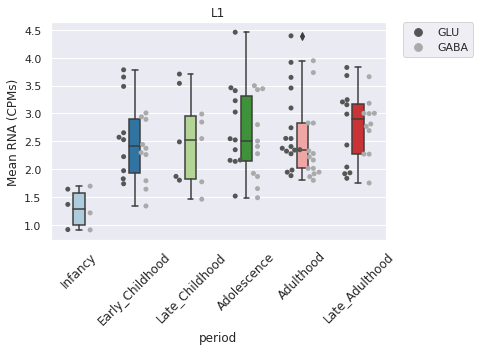

In [91]:
mod='L1'
plot_df = group_df[group_df['Class'] == mod]

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

In [133]:
#make into df with RNA, age, class, celltype
curr_df = sub_df
meta = meta
mode = 'granular'
meta_ = meta[['celltype', 'sex', 'age', 'period']]
meta_['period'][meta_['age'] == 1.02] = 'Early_Childhood'
if mode == 'granular':
    group_df = {'period':[], 'celltype':[], 'Class':[], 'Element':[], 'RNA':[]}
    l1_ind = [x for x,i in enumerate(curr_df.index) if 'L1' in i]#l1 ind
    alu_ind = [x for x,i in enumerate(curr_df.index) if 'Alu' in i]#alu ind
    sva_ind = [x for x,i in enumerate(curr_df.index) if 'SVA' in i]#sva ind

    l1_v = np.ravel([curr_df.iloc[l1_ind][i].values for i in meta['sample'].values])
    alu_v = np.ravel([curr_df.iloc[alu_ind][i].values for i in meta['sample'].values])
    sva_v = np.ravel([curr_df.iloc[sva_ind][i].values for i in meta['sample'].values])
    #make into df
    group_df['RNA'] = np.append(l1_v, np.append(alu_v, sva_v))
    group_df['Class'] = np.append(np.tile(curr_df.iloc[l1_ind].index.values, curr_df.shape[1]), 
                                  np.append(np.tile(curr_df.iloc[alu_ind].index.values,curr_df.shape[1]), np.tile(curr_df.iloc[sva_ind].index.values, curr_df.shape[1])))
    group_df['period'] = np.append(np.repeat(meta_['period'], len(l1_ind)).values,
                                  np.append(np.repeat(meta_['period'], len(alu_ind)).values, np.repeat(meta_['period'], len(sva_ind)).values))
    group_df['celltype'] = np.append(np.repeat(meta_['celltype'], len(l1_ind)).values,
                                  np.append(np.repeat(meta_['celltype'], len(alu_ind)).values, np.repeat(meta_['celltype'], len(sva_ind)).values))
    group_df['Element'] = np.append(np.repeat('L1', len(l1_v)),
                                  np.append(np.repeat('Alu', len(alu_v)), np.repeat('SVA', len(sva_v))))
    group_df = pd.DataFrame(group_df)
group_df

/tmp/ipykernel_3355824/1601047005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] == 1.02] = 'Early_Childhood'
/tmp/ipykernel_3355824/1601047005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_['period'][meta_['age'] == 1.02] = 'Early_Childhood'


,period,celltype,Class,Element,RNA
0,Adolescence,GABA,L1PA6,L1,0.600838
1,Adolescence,GABA,L1PA4,L1,1.845908
2,Adolescence,GABA,L1PA7,L1,1.693028
3,Adolescence,GABA,L1PA2,L1,1.147912
4,Adolescence,GABA,L1PA5,L1,2.500153
...,...,...,...,...,...
5259,Early_Childhood,GLU,SVA_D,SVA,0.864998
5260,Late_Adulthood,GABA,SVA_D,SVA,1.438398
5261,Late_Adulthood,GLU,SVA_D,SVA,1.313656
5262,Adulthood,GABA,SVA_D,SVA,0.584416


In [136]:
%autoreload
element = 'L1'
class_l = ['L1HS']#group_df[group_df['Element'] == element]['Class'].unique()
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'
sub_df = group_df[group_df['Element'] == element]
comp_df = ter.inf_paired_comp(class_l, cell_l, period_l, sub_df, 'granular')
l1_df = comp_df
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

,celltype,Class,Comparison,p value,padj_sig,statistic,effect_size,l2fc
3,GLU,L1HS,infancy_Adulthood,0.002074,True,-3.594143,-2.909460,1.073368
5,GABA,L1HS,infancy_Early_Childhood,0.009048,True,-3.161921,-2.424114,1.140509
8,GABA,L1HS,infancy_Adulthood,0.002833,True,-3.563011,-2.535331,1.118526
9,GABA,L1HS,infancy_Late_Adulthood,0.000334,True,-4.954248,-3.389704,1.245712


In [135]:
class_l

array(['L1PA6', 'L1PA4', 'L1PA7', 'L1PA2', 'L1PA5', 'L1PA8A', 'L1PA3',
       'L1HS'], dtype=object)

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


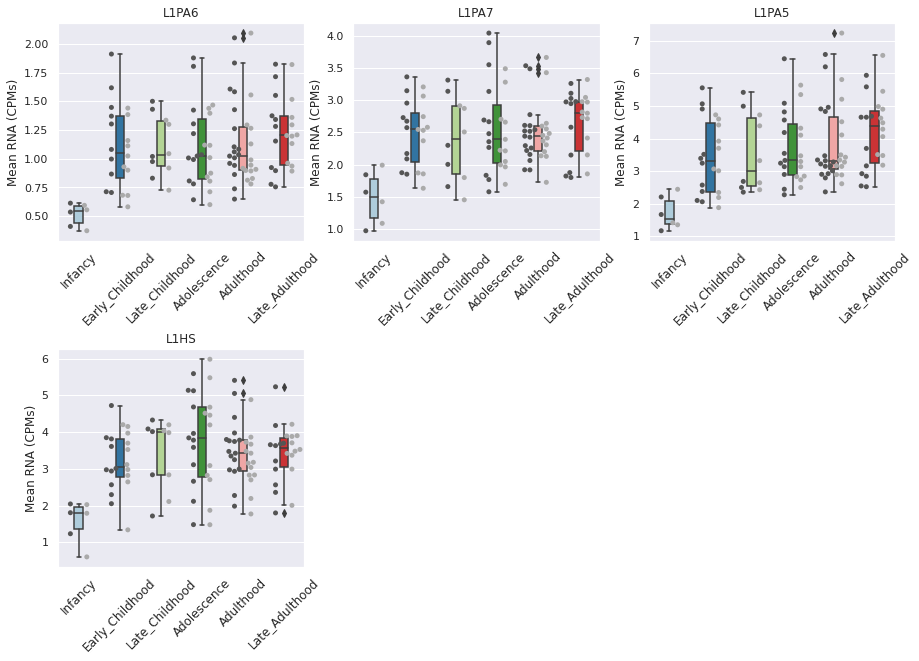

In [97]:
plot_l = sig_df['Class'].unique()
import seaborn as sns
import math
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for x,p in enumerate(plot_l):
    ax = plt.subplot(int(math.ceil(len(plot_l)/3)), 3, x + 1)

    plot_df = group_df[group_df['Class'] == p]
    sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
    sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
    #remove legend
    ax.get_legend().remove()
    #rotate x ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
    #set title
    ax.set_title(p, fontsize=12)
    #change y label
    ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
    #remove x label
    ax.set_xlabel('')
    #remove x tick labels
    #if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
#plt.savefig(s_fig + 'RNA_l1_multi_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


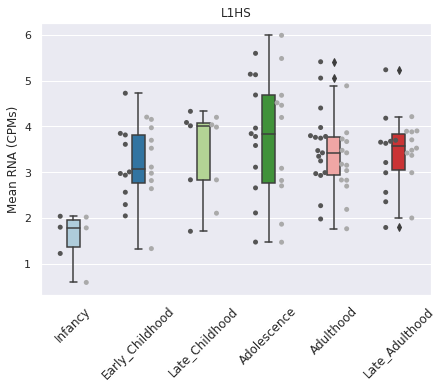

In [120]:
#Show L1HS
p = 'L1HS'
import seaborn as sns
import math
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(7,5))
plt.subplots_adjust(hspace=0.5)

plot_df = group_df[group_df['Class'] == p]
sns.boxplot(data=plot_df,x="period", y="RNA", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="RNA", hue="celltype", dodge=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#remove legend
ax.get_legend().remove()
#rotate x ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
#set title
ax.set_title(p, fontsize=12)
#change y label
ax.set_ylabel('Mean RNA (CPMs)', fontsize=12)
#remove x label
ax.set_xlabel('')
#remove x tick labels
#if x == 0 or x == 1 or x == 2: ax.set_xticklabels([])
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()


In [104]:
%autoreload
#Plot coarse levels of L1, Alu and SVA as a function of age for different cell types
curr_df = sub_df

#group by celltype
meta_gaba = meta[meta['celltype'] == 'GABA']
meta_glu = meta[meta['celltype'] == 'GLU']

l1_gaba = ter.te_group_el(curr_df, meta_gaba, 'L1')
l1_glu = ter.te_group_el(curr_df, meta_glu, 'L1')
alu_gaba = ter.te_group_el(curr_df, meta_gaba, 'Alu')
alu_glu = ter.te_group_el(curr_df, meta_glu, 'Alu')
sva_gaba = ter.te_group_el(curr_df, meta_gaba, 'SVA')
sva_glu = ter.te_group_el(curr_df, meta_glu, 'SVA')

l1_ = ter.te_group_el(curr_df, meta, 'L1')
alu_ = ter.te_group_el(curr_df, meta, 'Alu')
sva_ = ter.te_group_el(curr_df, meta, 'SVA')

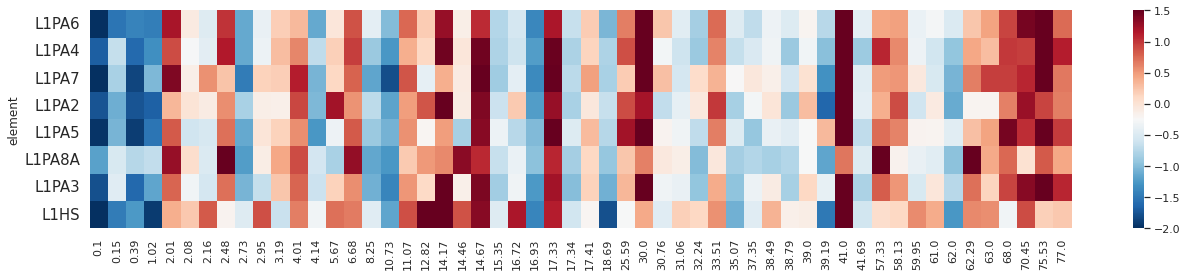

In [117]:
import seaborn as sns
#heatmap
data_l = l1_gaba
#sort columns by sort_name
sort_age, sort_name = adm.sort_2list(data_l[1], data_l[0].columns.values)
sort_df = data_l[0][sort_name]

fig, ax = plt.subplots(figsize=(22,4))
z = (sort_df - np.mean(sort_df, axis=1).values.reshape(-1, 1)) / np.std(sort_df, axis=1).values.reshape(-1, 1)
#only plot L1PA4, LPA2, L1PA5, LPA3, L1HS

sns.heatmap(z, cmap='RdBu_r', ax=ax, vmin=-2, vmax = 1.5)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=15)  # Increase fontsize here
ax.set_xticklabels(sort_age[ 0::1])
#ax.set_title('LINE')
#ax.set_ylabel('Cell Type')
plt.savefig(s_code + 'prac.svg', transparent=True)
plt.show()

In [137]:
#TET all RNA - passive and active
full_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/TET_counts.csv', index_col=0)
full_df['period'][full_df['age'] == 1.02] = 'Early_Childhood'

full_df

/tmp/ipykernel_3355824/2777104692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['period'][full_df['age'] == 1.02] = 'Early_Childhood'


,gene/TE,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GABA/Aligned.sortedByCoord.out.bam,CPM,Family,Element,Sample,age,celltype,period,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_1105_GLU/Aligned.sortedByCoord.out.bam,...,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT15HBMA007_GLU/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT15HBNA032_GLU/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT16HCQA020_GABA/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT16HCQA020_GLU/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT17HEIA010_GABA/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCT17HEIA010_GLU/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCTYPA008_GABA/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCTYPA008_GLU/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCTZZNA014_GABA/Aligned.sortedByCoord.out.bam,/cndd3/dburrows/DATA/te/rna/PE.bam/Sample_HCTZZNA014_GLU/Aligned.sortedByCoord.out.bam
60656,Alu:Alu:SINE,5542.0,597.596760,Alu,Alu,1105_GABA,16.93,GABA,Adolescence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60657,AluJb:Alu:SINE,519580.0,56026.583243,Alu,AluJb,1105_GABA,16.93,GABA,Adolescence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60658,AluJo:Alu:SINE,302991.0,32671.678054,Alu,AluJo,1105_GABA,16.93,GABA,Adolescence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60659,AluJr4:Alu:SINE,83062.0,8956.618918,Alu,AluJr4,1105_GABA,16.93,GABA,Adolescence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60660,AluJr:Alu:SINE,349730.0,37711.568878,Alu,AluJr,1105_GABA,16.93,GABA,Adolescence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61665,SVA_C:SVA:Retroposon,NaN,219.630717,SVA,SVA_C,HCTZZNA014_GLU,39.19,GLU,Adulthood,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2665.0
61666,SVA_D:SVA:Retroposon,NaN,1372.588966,SVA,SVA_D,HCTZZNA014_GLU,39.19,GLU,Adulthood,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16655.0
61667,SVA_E:SVA:Retroposon,NaN,205.043611,SVA,SVA_E,HCTZZNA014_GLU,39.19,GLU,Adulthood,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2488.0
61668,SVA_F:SVA:Retroposon,NaN,399.043877,SVA,SVA_F,HCTZZNA014_GLU,39.19,GLU,Adulthood,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4842.0


/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


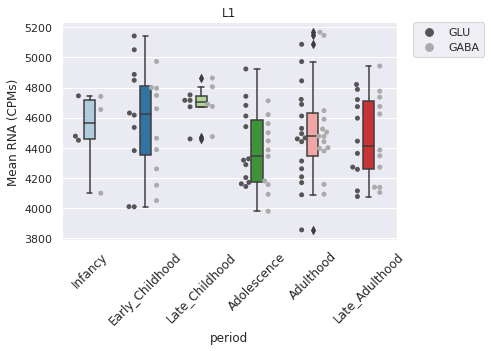

In [110]:
mod='L1'
group_df = full_df
plot_df = group_df[group_df['Family'] == mod]
plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
plot_df.reset_index(inplace=True)

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
#plt.savefig(s_fig + 'RNA_alu_boxplot.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

/home/dburrows/mambaforge/envs/base_conda/lib/python3.9/site-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


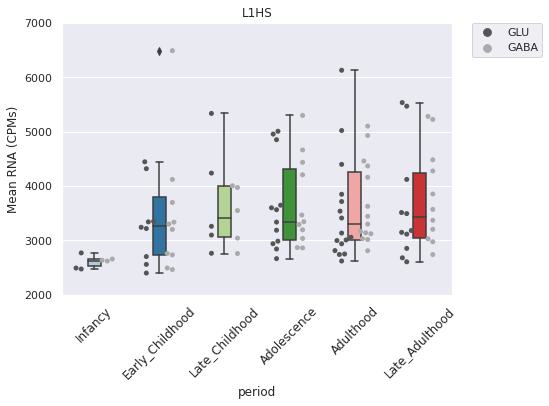

In [125]:
mod='L1HS'
group_df = full_df
plot_df = group_df[group_df['Element'] == mod]
plot_df = plot_df.groupby(['Sample', 'period', 'celltype']).mean()
plot_df.reset_index(inplace=True)


fig, ax = plt.subplots(figsize=(7,5))
plt.subplots_adjust(hspace=0.5)

#visualise each group with box plot seaborn
import seaborn as sns
sns.set_theme(style="darkgrid")
#sns.violinplot(data=plot_df, x="period", y="RNA", hue="Cell Type", split=True, hue_order=['GLU', 'GABA'], order=['infancy', 'earlychildhood', 'latechildhood', 'adolescence', 'adulthood', 'lateadulthood'], palette="Set1")
#show box plot
sns.boxplot(data=plot_df,x="period", y="CPM", width=0.2,order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='Paired')
sns.swarmplot(data=plot_df, x="period", y="CPM", hue="celltype", split=True, hue_order=['GLU', 'GABA'], order=['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'], palette='gray')
#move legend off plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Mean RNA (CPMs)', fontsize=12)
plt.title(mod)
plt.ylim(2000,7000)
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()

In [126]:
%autoreload
element='L1HS'
class_l = ['L1HS']
cell_l = 'GLU', 'GABA'
period_l = 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood'
sub_df = group_df[group_df['Element'] == element]

comp_df = {'celltype':[], 'Class':[], 'Comparison':[], 'p value':[], 'padj_sig': [], 'statistic':[], 'effect_size':[], 'l2fc':[]}
for cl in class_l:
    for cell in cell_l:
        for p in period_l:
            #get data
            curr_df = sub_df[sub_df['Element'] == cl]
            curr_df = curr_df[curr_df['celltype'] == cell]
            curr_df['RNA'] = curr_df['CPM']
            per_df = curr_df[curr_df['period'] == p]
            per_df['RNA'] = per_df['CPM']
            #get data for comparison
            comp_df['celltype'].append(cell)
            comp_df['Class'].append(cl)
            comp_df['Comparison'].append('infancy' + '_' + p)
            
            comp_df['p value'].append(ter.paired_test(curr_df['RNA'][curr_df['period'] == 'Infancy'], per_df['RNA'].values)[1])
            comp_df['statistic'].append(ter.paired_test(curr_df['RNA'][curr_df['period'] == 'Infancy'], per_df['RNA'].values)[0])
            comp_df['effect_size'].append((np.mean(curr_df['RNA'][curr_df['period'] == 'Infancy'].values) - np.mean(per_df['RNA'].values))/np.sqrt(((np.std(curr_df['RNA'][curr_df['period'] == 'Infancy'].values))**2 + (np.std(per_df['RNA'].values))**2)/2))
            comp_df['l2fc'].append(np.log2(np.mean(per_df['RNA'].values/(np.mean(curr_df['RNA'][curr_df['period'] == 'Infancy'].values)))))


if mode == 'coarse': scalar = 5
elif mode== 'granular': scalar = (5*len(class_l))
comp_df['padj_sig'] = np.asarray(comp_df['p value']) < 0.05/scalar
comp_df = pd.DataFrame(comp_df)
l1_df = comp_df
sig_df = comp_df[comp_df['padj_sig']==True]
sig_df

/tmp/ipykernel_3355824/83811128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_df['RNA'] = per_df['CPM']
/tmp/ipykernel_3355824/83811128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_df['RNA'] = per_df['CPM']
/tmp/ipykernel_3355824/83811128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,celltype,Class,Comparison,p value,padj_sig,statistic,effect_size,l2fc
2,GLU,L1HS,infancy_Adolescence,0.008791,True,1.0,-1.813233,0.494229


In [127]:
class_l

['L1HS']

In [128]:
comp_df['']

,celltype,Class,Comparison,p value,padj_sig,statistic,effect_size,l2fc
0,GLU,L1HS,infancy_Early_Childhood,0.111888,False,5.000000,-1.024972,0.562764
1,GLU,L1HS,infancy_Late_Childhood,0.114449,False,-1.845833,-1.733119,0.536071
2,GLU,L1HS,infancy_Adolescence,0.008791,True,1.000000,-1.813233,0.494229
3,GLU,L1HS,infancy_Adulthood,0.012281,False,3.000000,-1.124269,0.570212
4,GLU,L1HS,infancy_Late_Adulthood,0.021978,False,2.000000,-1.477185,0.485669
5,GABA,L1HS,infancy_Early_Childhood,0.160839,False,6.000000,-1.029925,0.391206
6,GABA,L1HS,infancy_Late_Childhood,0.046658,False,-2.497940,-2.354643,0.393590
7,GABA,L1HS,infancy_Adolescence,0.050476,False,-2.173522,-1.916605,0.487120
8,GABA,L1HS,infancy_Adulthood,0.034272,False,-2.328620,-2.023763,0.484732
9,GABA,L1HS,infancy_Late_Adulthood,0.045309,False,-2.233691,-1.969702,0.533841


# RNA upstream vs L1HS gene across lifespan

In [139]:
# Metadata
meta = pd.read_csv('/cndd3/dburrows/DATA/te/metadata/PE/metadata_RNA_QC.tsv', index_col=0)
meta = meta[meta['RNA_passQC']]

ev_df = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/evolutionary_age.csv')

#Counts data
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_new_CPM.csv', index_col=0)

#Filter low CPM data
thresh = 1 
ind = np.mean(df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]
meta_ = meta
meta_['period'][meta_['age'] == 1.02] = 'Early_Childhood'

#load in metadata
#meta_ = meta

#load in metadata
# meta_ = meta
# INF = meta_[meta_['period'] == 'Infancy']# <2 infancy
# ECH = meta_[meta_['period'] == 'Early_Childhood'] # 2-5 early childhood
# LCH = meta_[meta_['period'] == 'Late_Childhood'] #5-12 late childhood
# ADO = meta_[meta_['period'] == 'Adolescence'] #12-20 adolescence
# ADU = meta_[meta_['period'] == 'Adulthood'] #20-50 adulthood
# LADU = meta_[meta_['period'] == 'Late_Adulthood'] #50-80 late adulthood


In [140]:
#UNQ READS
#Load in binned rna expression
path = '/cndd/dburrows/DATA/te/rna/PE.counts/l1hs/'
s_list = glob.glob(path+'Samp*')
bins,counts,cpm,age,celltype,ID = [],[],[],[],[],[]

for s in s_list:
    total = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'+os.path.basename(s)+'/total_reads.txt', header=None)
    prac = pd.read_csv(s+'/l1hs_tss_bind.unq.counts', sep='\t', header=None, index_col=None)
    curr = prac.groupby([6]).sum()[7]
    bins = np.append(bins, curr.index.values)
    counts = np.append(counts,curr.values)
    cpm = np.append(cpm,(curr.values/total[0].values)*1e6)
    age = np.append(age,  np.repeat(meta_[meta_['sample'] == os.path.basename(s).split('Sample_')[-1]]['period'].values,len(curr.values)))
    celltype = np.append(celltype,np.repeat(os.path.basename(s).split('_')[-1], len(curr.values)))
    ID = np.append(ID,np.repeat(os.path.basename(s).split('Sample_')[-1], len(curr.values)))
    
data = {'bins': bins, 'counts': counts, 'cpm': cpm, 'age': age , 'celltype': celltype, 'ID':ID}
bin_df = pd.DataFrame(data)

NameError: name 'legend' is not defined

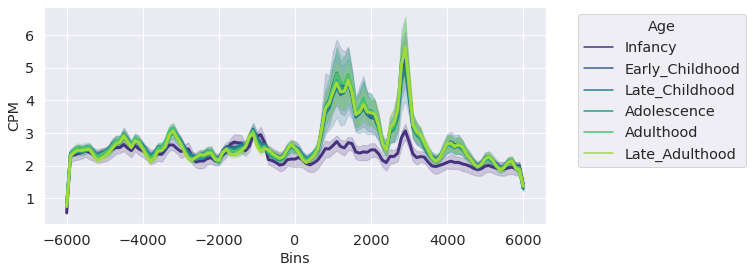

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming bin_df is your DataFrame

# Convert 'age' to a categorical type with ordered categories
age_order = ['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood']
bin_df['age'] = pd.Categorical(bin_df['age'], categories=age_order, ordered=True)

# Define a colormap for the age categories
palette = sns.color_palette("viridis_r", n_colors=len(age_order))

# Set the plot size
plt.figure(figsize=(9, 4))

# Create the line plot
sns.lineplot(data=bin_df, x="bins", y="cpm", hue="age", palette=palette, linewidth=3)

# Increase font size of the legend, axis labels, and ticks
plt.xlabel('Bins', fontsize='large')
plt.ylabel('CPM', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

# Get the legend
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large', title_fontsize='large')

# Increase the line width in the legend
for line in legend.get_lines():
    line.set_linewidth(8)
plt.legend().remove()
# Show the plot
plt.savefig(s_code+'prac.svg')
# Show the plot
plt.show()


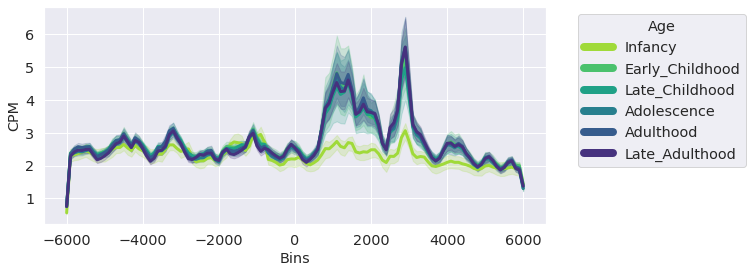

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bin_df is already loaded with your data
# Define your ordered categories
age_order = ['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood']
bin_df['age'] = pd.Categorical(bin_df['age'], categories=age_order, ordered=True)

# Define a colormap for the age categories
palette = sns.color_palette("viridis_r", n_colors=len(age_order))

# Set the plot size
plt.figure(figsize=(9, 4))

# Create the line plot
lineplot = sns.lineplot(data=bin_df, x="bins", y="cpm", hue="age", palette=palette, linewidth=3)

# Increase font size of the legend, axis labels, and ticks
plt.xlabel('Bins', fontsize='large')
plt.ylabel('CPM', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

# Get the legend, and modify it
legend = plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large', title_fontsize='large')

# Increase the line width in the legend
for line in legend.get_lines():
    line.set_linewidth(8)

# Optionally, if you want to remove the legend after increasing line width
# plt.legend().remove()

# Show the plot
plt.savefig(s_code + 'prac.svg', transparent=False)
plt.show()


In [145]:
#UNQ READS
#Quantify promoter expression normalised by upstream
path = '/cndd/dburrows/DATA/te/rna/PE.counts/l1hs/'
s_list = glob.glob(path+'Samp*')
bins,counts,cpm,age,celltype,ID = [],[],[],[],[],[]
nbins=60
for s in s_list:
    total = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'+os.path.basename(s)+'/total_reads.txt', header=None)
    prac = pd.read_csv(s+'/l1hs_tss_bind.unq.counts', sep='\t', header=None, index_col=None)
    curr = prac.groupby([6]).sum()[7]
    #take the first 10 bins after promoter
    curr_prom = np.sum(curr[curr.index[int(len(curr.index)/2):int(len(curr.index)/2)+nbins]])
    #take the first 10 bins before promoter
    curr_up = np.sum(curr[curr.index[int(len(curr.index)/2)-nbins:int(len(curr.index)/2)]])
    
    counts = np.append(counts,[np.log2(curr_prom/curr_up)])
    #cpm = np.append(cpm, [(curr_up/total[0].values)*1e6,(curr_prom/total[0].values)*1e6 ])
    age = np.append(age,  np.repeat(meta[meta['sample'] == os.path.basename(s).split('Sample_')[-1]]['period'].values,1))
    celltype = np.append(celltype,np.repeat(os.path.basename(s).split('_')[-1], 1))
    ID = np.append(ID,np.repeat(os.path.basename(s).split('Sample_')[-1], 1))
    
data = {'log2fc': counts, 'age': age , 'celltype': celltype, 'ID':ID}
bin_df = pd.DataFrame(data)

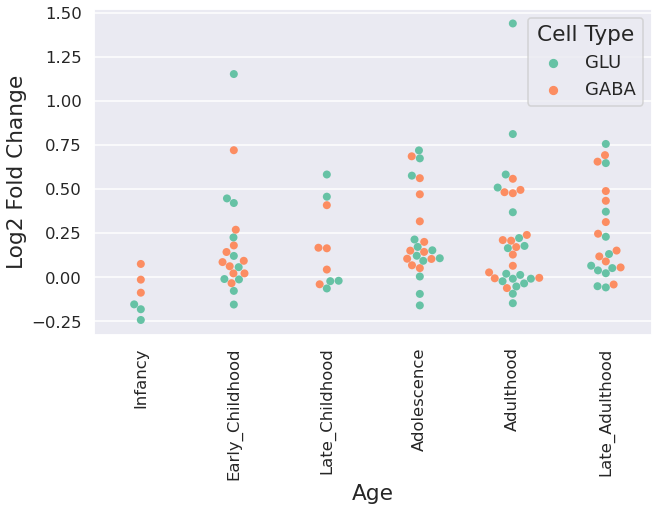

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bin_df is your DataFrame
# Define age order
age_order = ['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood']

# Set larger font and plot context
sns.set_context('talk')  # For larger fonts, 'talk' context is used

# Choose an appealing color palette for hues
palette = sns.color_palette('Set2')  # Example palette, can be changed

# Create the swarm plot with specified customizations
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.swarmplot(data=bin_df, x="age", y="log2fc", hue="celltype", order=age_order, palette=palette, size=8)

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

# Enhance font size for labels and legend
plt.xlabel('Age', fontsize='large')
plt.ylabel('Log2 Fold Change', fontsize='large')
plt.legend(title='Cell Type', fontsize='medium', title_fontsize='large')
plt.savefig(s_code + 'prac.svg')
# Show the plot
plt.show()

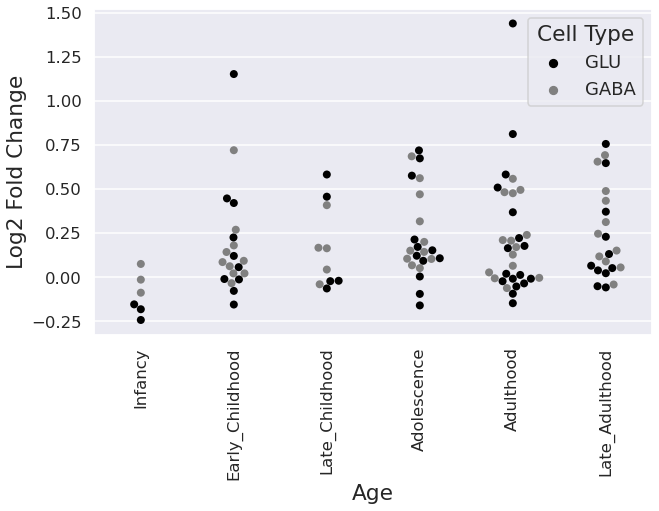

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bin_df is your DataFrame
# Define age order
age_order = ['Infancy', 'Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood']

# Set larger font and plot context
sns.set_context('talk')  # For larger fonts, 'talk' context is used

# Define a custom color palette
palette = {'GLU': 'black', 'GABA': 'grey'}  # Assigning specific colors to cell types

# Create the swarm plot with specified customizations
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.swarmplot(data=bin_df, x="age", y="log2fc", hue="celltype", order=age_order, palette=palette, size=8)

# Rotate x-axis labels to 90 degrees for better readability
plt.xticks(rotation=90)

# Enhance font size for labels and legend
plt.xlabel('Age', fontsize='large')
plt.ylabel('Log2 Fold Change', fontsize='large')
legend = plt.legend(title='Cell Type', fontsize='medium', title_fontsize='large')

# Optionally increase legend line width
for line in legend.get_lines():
    line.set_linewidth(4)

# Save the plot
plt.savefig(s_code + 'prac.svg')
# Display the plot
plt.show()


In [148]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Assuming bin_df is your DataFrame and it has columns 'age' and 'log2fc'
# Note: Replace bin_df with the actual name of your DataFrame

# Filter out data for pairwise comparisons
infancy_data = bin_df[bin_df['age'] == 'Infancy']['log2fc']

# List of age categories for comparison
age_categories = ['Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood']

# Perform pairwise t-tests
p_values = []
comparisons = []
for age_category in age_categories:
    other_group_data = bin_df[bin_df['age'] == age_category]['log2fc']
    t_stat, p_val = stats.ttest_ind(infancy_data, other_group_data, equal_var=False)  # Welch's t-test
    comparisons.append(f"Infancy vs {age_category}")
    p_values.append(p_val)

# Adjust for multiple comparisons using Bonferroni correction
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# Print the results
for comparison, p_val in zip(comparisons, corrected_p_values):
    print(f"{comparison}: Corrected p-value = {p_val:.4f}")


Infancy vs Early_Childhood: Corrected p-value = 0.0114
Infancy vs Late_Childhood: Corrected p-value = 0.0450
Infancy vs Adolescence: Corrected p-value = 0.0008
Infancy vs Adulthood: Corrected p-value = 0.0014
Infancy vs Late_Adulthood: Corrected p-value = 0.0007


In [149]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Assuming bin_df is your DataFrame and it has columns 'age', 'log2fc', and 'celltype'
# Note: Replace bin_df with the actual name of your DataFrame

# List of age categories for comparison
age_categories = ['Early_Childhood', 'Late_Childhood', 'Adolescence', 'Adulthood', 'Late_Adulthood']

# Define cell types for separate analysis
cell_types = ['GLU', 'GABA']

# Perform pairwise t-tests for each cell type
results = []
for cell_type in cell_types:
    print(f"Results for {cell_type}:")
    
    # Filter data for 'Infancy' and specific cell type
    infancy_data = bin_df[(bin_df['age'] == 'Infancy') & (bin_df['celltype'] == cell_type)]['log2fc']
    
    # Initialize lists for p-values and comparisons
    p_values = []
    comparisons = []
    
    # Compare 'Infancy' data against other age groups for the same cell type
    for age_category in age_categories:
        other_group_data = bin_df[(bin_df['age'] == age_category) & (bin_df['celltype'] == cell_type)]['log2fc']
        t_stat, p_val = stats.ttest_ind(infancy_data, other_group_data, equal_var=False)  # Welch's t-test
        comparisons.append(f"Infancy vs {age_category}")
        p_values.append(p_val)
    
    # Adjust for multiple comparisons using Bonferroni correction
    corrected_p_values = multipletests(p_values, method='bonferroni')[1]
    
    # Store and print results
    for comparison, p_val in zip(comparisons, corrected_p_values):
        result = f"{comparison}: Corrected p-value = {p_val:.4f}"
        results.append((cell_type, result))
        print(result)

    print("\n")  # Print a newline for better separation between cell type results


Results for GLU:
Infancy vs Early_Childhood: Corrected p-value = 0.0421
Infancy vs Late_Childhood: Corrected p-value = 0.2495
Infancy vs Adolescence: Corrected p-value = 0.0024
Infancy vs Adulthood: Corrected p-value = 0.0033
Infancy vs Late_Adulthood: Corrected p-value = 0.0042


Results for GABA:
Infancy vs Early_Childhood: Corrected p-value = 0.3793
Infancy vs Late_Childhood: Corrected p-value = 0.6438
Infancy vs Adolescence: Corrected p-value = 0.0397
Infancy vs Adulthood: Corrected p-value = 0.0718
Infancy vs Late_Adulthood: Corrected p-value = 0.0301




# Celltype RNA differences

In [ ]:
# Save count data across all donors as dataframe
#meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')
ev_df = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/evolutionary_age.csv')
guide_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_CPM.csv', index_col=0)

#Load in PE data for each sample
mode='Count'
ID_l = meta['sample'].values
parent_path = '/cndd/dburrows/DATA/te/rna/PE.counts/ATEM/'
te = ev_df['element'].values
dict = {'element':te}
for ID in ID_l:
    te_v = ter.load_ATEM_family(parent_path + '/Sample_' + ID + '/ATEM_counts.csv', te, mode)
    assert len(te) == len(te_v), 'Error: Not all TE elements were counted'
    #Add to dict
    dict[ID] = te_v
df = pd.DataFrame(dict)
#set first column to index
df.set_index('element', inplace=True)
df = df.astype(int)

#Filter based on low CPM data
thresh = 1 
ind = np.mean(guide_df, axis=1) >thresh #indeces of ones to keep
sub_df = df.loc[ind]

#write to csv
l1_df = sub_df[sub_df.index.str.contains('L1')]
alu_df = sub_df[sub_df.index.str.contains('Alu')]
sva_df = sub_df[sub_df.index.str.contains('SVA')]

coarse_df = pd.DataFrame()
coarse_df['L1'] = np.mean(l1_df,axis=0).astype(int)
coarse_df['Alu'] = np.mean(alu_df,axis=0).astype(int)
coarse_df['SVA'] = np.mean(sva_df,axis=0).astype(int)

#coarse_df.T.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_coarse_sub-COUNT.csv')

In [ ]:
# generate design matrix 
# only keep some columns in meta
dm = meta[['Cell Type', 'sex', 'race', 'AGEYEARS']]
dm['race'][dm['race'] !='White'] = 'Black'
age_ = dm['AGEYEARS'].values
new_age = (age_ - np.mean(age_))/np.std(age_)
dm['AGEYEARS'] = new_age
dm.index = meta['sample'].values
dm.to_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_design.csv')

In [150]:
#Load in CPMS
df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_sub-COUNT.csv', index_col=0)
coarse_df = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/ATEM_coarse_sub-COUNT.csv', index_col=0)

#Load in evolutionary age
evol_age = pd.read_csv('/cndd3/dburrows/DATA/annotations/rmsk/evolutionary_age.csv')

#Load in DESEQ results
cell_res = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/granular_DESEQ-celltype.csv', index_col=0)
cell_coarse_res = pd.read_csv('/cndd/dburrows/DATA/te/rna/PE.counts/DE/coarse_DESEQ-celltype.csv', index_col=0)

In [151]:
#GLU vs GABA comparison
cell_res[cell_res['padj'] < 0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
L1PA6,1023.886841,0.216371,0.044559,4.855791,1.199071e-06,9.592564e-06
L1PA8A,407.104400,0.873616,0.085287,10.243266,1.268789e-24,7.105218e-23
L1PA8,357.603820,0.197672,0.043159,4.580087,4.647824e-06,3.253477e-05
AluYj4,2590.220936,-0.135907,0.017574,-7.733364,1.047413e-14,2.932758e-13
FLAM_C,587.731689,-0.240696,0.036359,-6.620075,3.590169e-11,5.026237e-10
AluYf1,2329.548675,-0.130927,0.018265,-7.168086,7.605350e-13,1.419665e-11
AluYk3,1178.286955,-0.096515,0.018866,-5.115694,3.125896e-07,2.917503e-06
AluYi6,661.930972,-0.243020,0.061900,-3.926004,8.636868e-05,4.836646e-04
AluYc3,719.884953,-0.077428,0.025597,-3.024855,2.487523e-03,1.160844e-02
AluYb8,8473.110616,-0.112198,0.043309,-2.590631,9.580022e-03,4.126779e-02


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


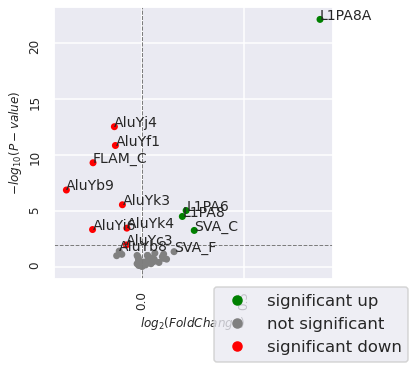

In [152]:
#left = GABA > GLU
#right = GLU > GABA
from bioinfokit import analys, visuz
cell_res['geneid'] = cell_res.index
normp_inadj = np.max(cell_res['pvalue'][cell_res['padj'] < 0.05])

# load dataset as pandas dataframe
visuz.GeneExpression.volcano(df=cell_res, lfc='log2FoldChange', pv='padj', dim = (5,5), dotsize=30, 
                             geneid = 'geneid', genenames = tuple(cell_res[cell_res['padj'] < 0.05]['geneid'].values), 
                             valpha = 1,gstyle=1, sign_line=True
                             ,plotlegend=True, legendpos='upper right',
                             legendanchor=(1.30,0), pv_thr = (normp_inadj,normp_inadj), lfc_thr=(0,0), 
                             axtickfontsize=12, axlabelfontsize=12, gfont=14, figtype='svg', figname=s_fig + '/ATEM_PE_celltype', show=True)
                            

In [154]:
#Compare the infancy -> adulthood effects in GLU vs GABA
cat_df = pd.concat([l1_df, alu_df, sva_df])
curr_df = cat_df[(cat_df['Comparison'] == 'infancy_Adulthood') & (cat_df['statistic']<0)]
curr_df

NameError: name 'alu_df' is not defined

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))

plot_df = curr_df.pivot(index='Class', columns='celltype', values='l2fc')

ind = []
for i in plot_df.index:
    if 'L1' in i: ind.append(i[:2])
    else: ind.append(i[:3])
plot_df['family'] = ind
sns.scatterplot(data = plot_df, x='GABA', y='GLU', hue='family', s=60)
plt.plot([0.3, 1], [0.3, 1], linestyle='--', color='gray')
plt.xlim(0.3,1)
plt.ylim(0.3,1)
plt.legend(fontsize=15)
#set title
ax.set_title('Adulthood vs Infancy', fontsize=15)
#change y label
ax.set_ylabel('Log2FC GLU', fontsize=15)
#remove x label
ax.set_xlabel('Log2FC GABA', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.savefig(s_code + 'prac.svg', bbox_inches='tight', dpi=300, transparent=False)
plt.show()